In [1]:
import jCMIP as jc
Clist = jc.readList(('CMIP6listnew'))

from netCDF4 import Dataset
from netCDF4 import num2date
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import cftime
import gsw
from datetime import date, timedelta
import pandas as pd
from scipy.interpolate import interp1d

#### Transport plot (dx,dz) and FS boundary

/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


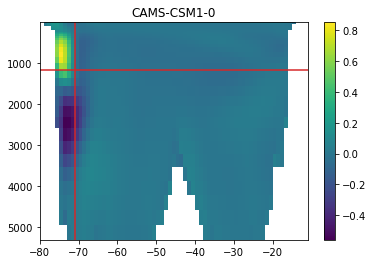

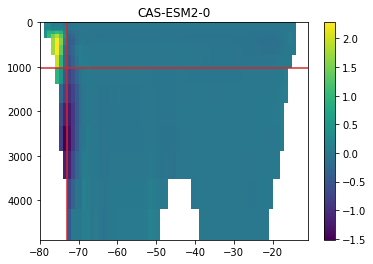

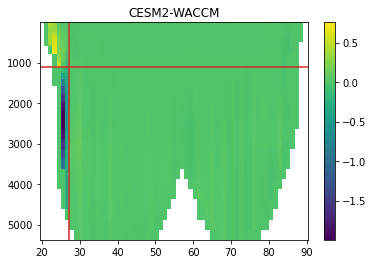

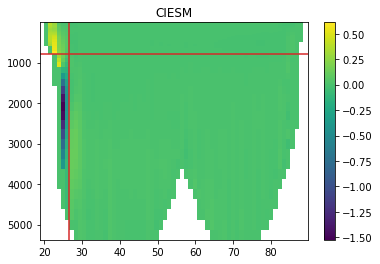

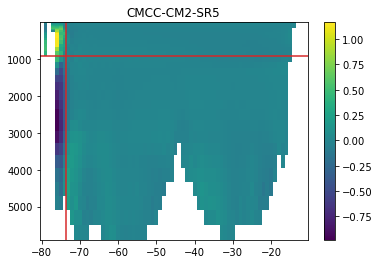

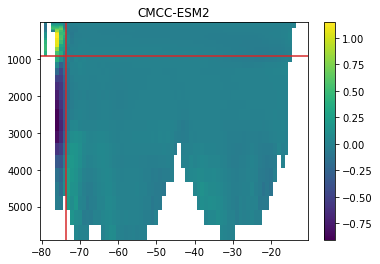

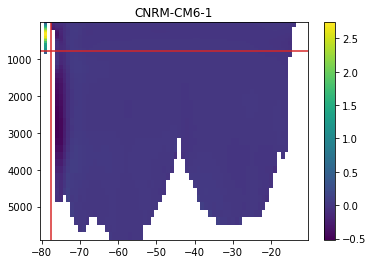

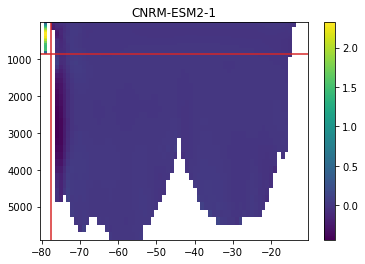

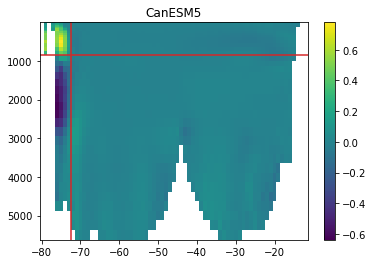

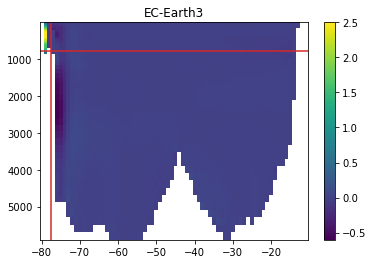

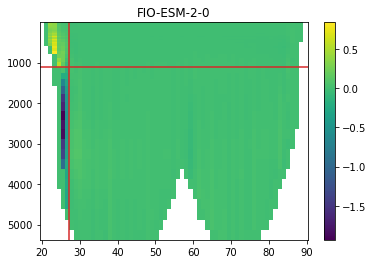

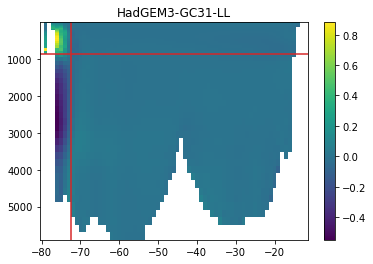

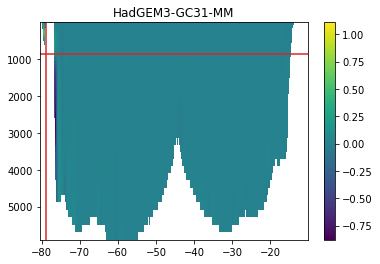

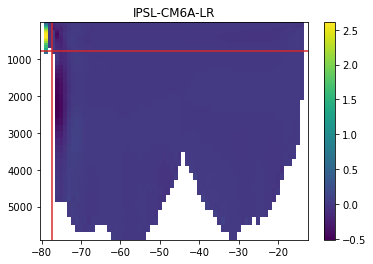

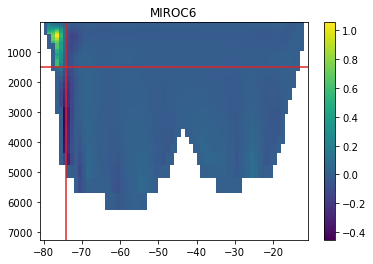

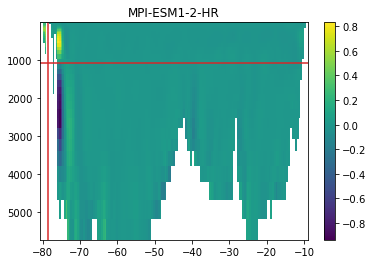

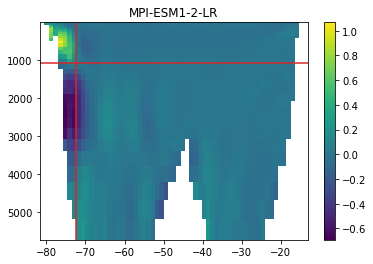

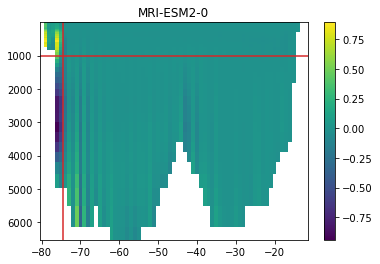

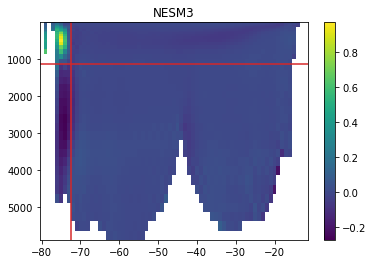

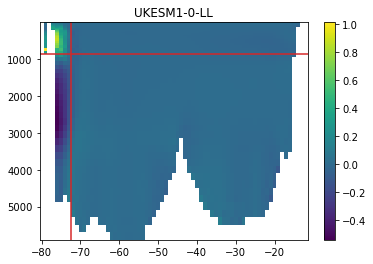

In [2]:
totmod =  ['CAMS-CSM1-0','CAS-ESM2-0','CESM2-WACCM','CIESM','CMCC-CM2-SR5','CMCC-ESM2','CNRM-CM6-1','CNRM-ESM2-1','CanESM5','EC-Earth3','FIO-ESM-2-0',
            'HadGEM3-GC31-LL','HadGEM3-GC31-MM','IPSL-CM6A-LR','MIROC6','MPI-ESM1-2-HR','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','UKESM1-0-LL']
ENS    =  ['r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2','r2i1p1f2','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f3',
           'r1i1p1f3','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2']
EXP   = 'historical'

for mod in range (len(totmod)):
    outfile = ('/home/users/jordi/section26data/' + totmod[mod] + '_' + EXP + '_' + ENS[mod] + '.nc')
    ncid    = Dataset(outfile,'r')
    lev     = ncid.variables['lev'][:]
    lon     = np.squeeze(ncid.variables['lon'][:,:])
    tp15    = ncid.variables['tp15'][:,:,:]
    ncid.close()
    
    #Find FS boundary
    tp15mean = np.nanmean(tp15,axis=0)
    tprow15 = np.nansum(tp15mean,axis=1)
    mocbtv  = -1*np.cumsum(tprow15[::-1])[::-1]
    imax2   = np.where(mocbtv == max(mocbtv))
    imax1   = imax2[0]
    imax    = imax1[0]
    
    tpcol15 = np.nansum(tp15mean[0:imax,:],axis=0)
    mx     = np.nanargmin(np.abs(tpcol15 - max(tpcol15)))
    idx2   = np.where(tpcol15[mx::]<0)
    idx1   = idx2[0]
    idx = idx1[0] + mx
    
    #if totmod[mod] == 'MPI-ESM1-2-HR':
    #    tpcol15 = np.nansum(tp15mean[0:imax,:],axis=0)
    #    idx2   = np.where(tpcol15[8::]<0)
    #    idx1   = idx2[0]
    #    idx = idx1[0] + 8
    #    print(idx)
    
    plt.figure(mod)
    plt.pcolormesh(lon,lev,tp15mean)
    plt.axvline(x=lon[idx],color='C3')
    plt.axhline(y=lev[imax],color='C3')
    plt.gca().invert_yaxis()
    plt.title(totmod[mod])
    plt.colorbar()

#### Check MPI-ESM1-2-HR

In [5]:
totmod =  'MPI-ESM1-2-HR'
ENS    =  'r1i1p1f1'
EXP    = 'historical'

outfile = ('/home/users/jordi/section26data/' + totmod + '_' + EXP + '_' + ENS + '.nc')
ncid    = Dataset(outfile,'r')
lev     = ncid.variables['lev'][:]
lon     = np.squeeze(ncid.variables['lon'][:,:])
tp15    = ncid.variables['tp15'][:,:,:]
ncid.close()
    
#Find FS boundary
tp15mean = np.nanmean(tp15,axis=0)
tpcol15  = np.nansum(tp15mean,axis=0)
print(tpcol15)

[ 0.          0.          0.08269702  4.92890206  0.61064488  0.08890058
 -0.0429051  -0.05374079  0.3847368   0.15713742  0.32295908  2.05345299
  0.63118591 -0.64715701 -1.51444995 -1.30587576 -0.35136528  0.71376989
  1.63137388  1.87836869  1.58509698  1.15359946  0.69948569  0.14490372
 -0.3288015  -0.55052202 -0.53349306 -0.34584611 -0.09205862 -0.05838913
 -0.06283074 -0.03709762 -0.04225313 -0.09906049 -0.10161918 -0.05234217
  0.12602489  0.14669819  0.10235725  0.25915681  0.37966312  0.28943794
  0.13378375 -0.00875343 -0.13898426 -0.16096011 -0.09131702 -0.08116019
 -0.09834715 -0.09655249 -0.08377246 -0.08010977 -0.07877239 -0.07232105
 -0.06380718 -0.05744477 -0.04645159 -0.03609589 -0.03575703 -0.03934824
 -0.06511527 -0.10217791 -0.12780552 -0.1238559  -0.09543721 -0.05212768
 -0.04749303 -0.06826552 -0.06494699 -0.15840852 -0.26744691 -0.32921663
 -0.32406253 -0.23982501 -0.21458573 -0.29755871 -0.28809097 -0.06894252
 -0.13368072 -0.26028844 -0.08569468 -0.1303737  -0

/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
